# STAT207 Mini-Project #1 - Video Games


Isabella Iniguez

In [96]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Introduction

The research question I intend to answer in this report is:

How does the nature of the relationship between `Review Score` and `Sales` change for different values of `Max Players` in the dataset?

As a fan of video games and hopeful future developer, I try to understand what makes for a better player experience. One part of that experience that I feel can sway the perception of the game is the number of players able to play together. I personally feel I enjoy some games more when I have friends to join in on the fun and so I often gravitate to games with multiplayer options. You also hear about games whose sales don't accurately reflect their quality (measured here with Review Score), so I wondered if some inconsitencies could of resulted from the number of players in a game.

Professional game developers and marketers may find this answer interesting given that they'd ideally want their game to appeal to as many people as possible to boost sales. If the game was considering adding a multiplayer expansion, these results may be worth factoring into the decision if it will impact how well a game sells. It may also impact how much marketers may want to push the multiplayer aspect of some game if it can possibly increase their sales on a low rated title.

## 2. Dataset Discussion

To answer the research question, I will be exploring the CORGIS Dataset Project's Video Games CSV File. The dataset contains information on the sales and playtime of thousands of video game titles released between 2004 and 2010. The playtime information was collected from crowd-sourced data on “How Long to Beat”. 

Each row represents a video game; however, the games observed are not inclusive of all game types. For example, while not directly stated from the source, the games observed appear to all support online play and be sequels. This means that game developers/marketers whose game does not meet one or both of these critera may find the conclusions made here to not accurately reflect their game. For example, perhaps the games being sequels already gave them exposure and hype from pre-existing fans of the initial title (thus sales are high regardless), so those whose game isn't a sequel won't find the same trends as applicable.

There is also the fact that the dataset itself is somewhat outdated, with more than a decade's worth of game releases not represented. The trends in what players value in a game may have changed in more recent years, thus game developers/marketers must keep this time difference in mind when considering how their more modern game may align with the analysis of this older dataset.

The three variables I intend to explore are:

`Metrics.Review Score` - A typical review score for this game, out of 100.

`Metrics.Sales` - The total sales made on this game, measured in millions of dollars.

`Features.Max Players` - The maximum number of players that can play this game.

This file was downloaded on 9/8/2023, linked [here](https://corgis-edu.github.io/corgis/csv/video_games/).

In [97]:
df = pd.read_csv("video_games.csv")
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [98]:
len(df)

1212

There are 1212 rows in this dataframe.

## 3. Dataset Cleaning

First, I'll create a new dataframe with only the relevant variable columns I'll be exploring.

In [99]:
df_vars = df[["Metrics.Review Score", "Metrics.Sales", "Features.Max Players"]]

**Missing Value Detection and Cleaning**

Checking for any explicit missing values first, we see that there are a sum of zero NaN values present in any of the three columns. Meaning there are no explicit missing values.

Then to check for implicit missing values, we look at the types of data in every column. Given that we are expecting numerical data, any unexpected strings representing missing values would result in the column's data type being generalized to "object". The types displayed are all numerical, so there are no implicit missing values.

It is fortunate that there are no missing values since we won't have to consider how we will handle them (e.g. dropping rows or replacing values with mean). This means that the analysis will continue to consider all of the original observations without any manual skewing of data.

In [100]:
df_vars.isna().sum()

Metrics.Review Score    0
Metrics.Sales           0
Features.Max Players    0
dtype: int64

In [101]:
df_vars.dtypes

Metrics.Review Score      int64
Metrics.Sales           float64
Features.Max Players      int64
dtype: object

**Sample Size Cleaning**

Given that one of the three variables is categorical (`Features.Max Players`), then we should make sure that every distinct number of max players has at least 10 corresponding observations in the dataset so all categories are represented.

It is observed that the catergories of 6, 7, and 8 do not have at least 10 observations, thus any corresponding rows will be dropped.

In [102]:
print(len(df_vars[df_vars["Features.Max Players"] == 6]))
print(len(df_vars[df_vars["Features.Max Players"] == 7]))
print(len(df_vars[df_vars["Features.Max Players"] == 8]))

7
8
2


In [103]:
df_cleaned = df_vars[df_vars["Features.Max Players"] < 6]

**Outlier Cleaning - Single Variable Outlier Inspection**

To check if there are any outlier present in the two numerical variables (`Metrics.Review Score` & `Metrics.Sales`), I will create a boxplot for each variable (outliers shown as individual points).

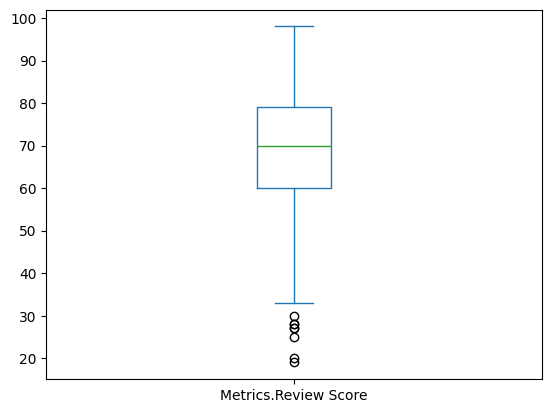

In [104]:
df_cleaned["Metrics.Review Score"].plot.box()
plt.show()

We see that while there are outliers present in the `Metrics.Review Score` data, they are not too significanly distant from the rest of the data. They won't skew the conclusions as much. Thus, I feel that it wouldn't be worth loosing the representation of these points in the analysis to remove them.

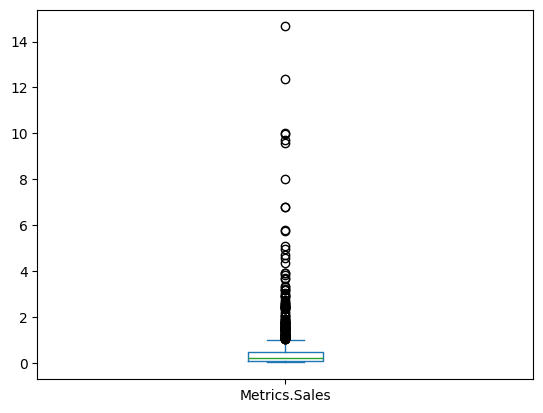

In [105]:
df_cleaned["Metrics.Sales"].plot.box()
plt.show()

On the other hand, we see that there are significant outliers present in the `Metrics.Sales` data, and the majority are distant from the rest of the data. Their presence will very likely skew the conclusions, perhaps showing more exaggerated trends than what would be expected of your typical game. Thus, it would be beneficial to loose the representation of these points to avoid weakening the rest of the more relevant data's representation. Removing them from out dataset, we dropped 224 rows.

In [106]:
df_cleaned2 = df_cleaned[df_cleaned["Metrics.Sales"] < 0.61]
len(df_cleaned) - len(df_cleaned2)

224

**Outlier Cleaning - Two Variable Outlier Inspection**

To check if there are any outliers present in the relationship between the two numerical variables (`Metrics.Review Score` & `Metrics.Sales`), I will create a scatterplot of the two.

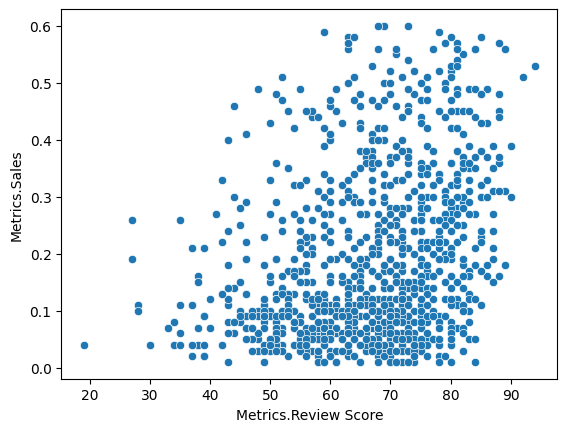

In [107]:
sns.scatterplot(x="Metrics.Review Score", y = "Metrics.Sales", data=df_cleaned2)
plt.show()

Here, we see that there a few potential outliers present (e.g. see points with Review Scores below 30). In the previous cleaning, I believed that the outliers in the `Metrics.Review Score` data would not be too impactful on the dataset, and these are the same points. They do seem to follow the overall trend of the plot, so I'd consider them still worth keeping for the same reasons as before.

**Other Data Cleaning**

When I tried to answer the research question, I discovered that the different numbers of max players were not evenly distributed across the different Review Score values. In particular, the games with a max of 4 players had a minimum Review Score of 39 and a maximum of 86 while the other player numbers categories had observations that went beyond those bounds. 

This means that the 4 player games were not accurately represented beyond these bounds and a comparison between the trend of these games and those of the other categories may not be accurate. I felt that this gave me enough reason to choose to drop rows that are beyond these bounds. In total, I dropped 44 rows.

In [108]:
min_4players = df_cleaned2[df_cleaned2["Features.Max Players"] == 4]["Metrics.Review Score"].min()
max_4players = df_cleaned2[df_cleaned2["Features.Max Players"] == 4]["Metrics.Review Score"].max()
df_cleaned3 = df_cleaned2[(df_cleaned2["Metrics.Review Score"] >= min_4players) & 
                          (df_cleaned2["Metrics.Review Score"] <= max_4players)]
len(df_cleaned2) - len(df_cleaned3)

44

## 4. <u>Research Question</u>: How does the Relationship between `Review Score` and `Sales` change for different values of `Max Players` in the Dataset?

Below is the scatter plot we will use to answer the research question, note the data points and regression lines are color coded based on `Max Players`.

The related correlation coefficient table is also below.

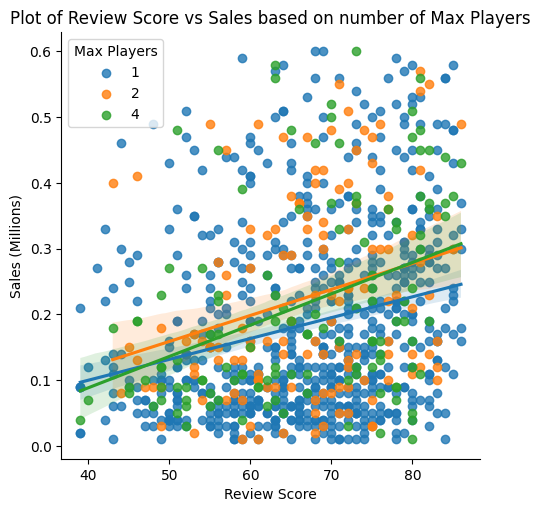

In [109]:
sns.lmplot(x="Metrics.Review Score", y = "Metrics.Sales", hue= "Features.Max Players", data=df_cleaned3, legend = False).set(
    title='Plot of Review Score vs Sales based on number of Max Players', xlabel = 'Review Score', ylabel ='Sales (Millions)')
plt.legend(title='Max Players', loc='upper left')
plt.show()

In [110]:
df_cleaned3.groupby("Features.Max Players").corr()

Metrics.Review Score  Metrics.Sales
Features.Max Players                                                          
1                    Metrics.Review Score              1.000000       0.244272
                     Metrics.Sales                     0.244272       1.000000
2                    Metrics.Review Score              1.000000       0.268732
                     Metrics.Sales                     0.268732       1.000000
4                    Metrics.Review Score              1.000000       0.382920
                     Metrics.Sales                     0.382920       1.000000

**Discussion**

Here, I will break down the ways the relationship between `Review Score` and `Sales` change for different values of `Max Players` in the dataset.

1. Direction changes:

    There were no direction changes across different values of `Max Players`, the relationship between `Review Score` and `Sales` are all positive.
2. Shape changes:

    There were no major shape changes across different values of `Max Players`, the relationship between `Review Score` and `Sales` are all linear. Although, it appears that games with 2 Max players appear to sell the most across the majority of the Review Scores, followed by 4 Max Players, then 1 Max Player (shown by how high the the reggression lines are placed compared to one another, with some overlap).
3. Strength changes:

    The strength of the relationship between `Review Score` and `Sales` increases across different values of `Max Players`, increasing as the number of max players increases. The strengths with 1 and 2 Max Players are similar (with correlation coefficients of 0.2443 and 0.2687 respectively), while the strength at 4 Max Players is greater than both (0.3829).

4. Outlier differences:

    As it was stated in the previous section, there were a multitude of outliers that were removed for several reasons. As the data stands now, there doesn't appear to be any significant outliers depending on the different values of `Max Players`.
5. Slope changes:

    As was with the strength, the slope of the relationship between `Review Score` and `Sales` increases across different values of `Max Players`, increasing as the number of max players increases. This can be seen in the scatterplot's regression lines and the corelation coefficents mentioned previously.

**Overall Answer**

A greater number of `Max Players` results in a more positive relationship `Review Score` and `Sales`.

## 5. Conclusion

**Summary**

As the number of `Max Players` increases, we see that the relationship between `Review Score` and `Sales` strengthens (becomes more positive). It also shows that multiplayer games tend to result in more game sales despite review scores.

**Shortcomings/Caveats**

One major shortcoming of this analysis was that a large portion of the original dataset was not ultimately considered. As shown below, about 24% of the original dataset was dropped. This may have tweaked the outcome of the answer since many observations were not included in the final analysis. Game developers/marketers with games that more closely align with the games whose rows were dropped during cleaning may not fully trust the conclusions to apply to their game since similar games were not considered in the analysis.

There is also the fact that the dataset itself was somewhat limited to begin with. I could have searched for a more modern and inclusive dataset that would have better represented the current game scene. This would make the conclusions more relevant and applicable to current day game developers/marketers.

In [111]:
(len(df) - len(df_cleaned3)) / len(df)

0.23514851485148514

**Future Work**

One idea I had, given that this dataset was limited to sequels, was the posibility of analysing how sequels differed from the original game. Particularly, if it improved or significantly changed the *type* of game it was. For example, the game Unravel was originally a single player game, but it's sequel Unravel Two added local co-op. I wonder if other series share similar significant differences and if there were trends.